In [12]:
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
 
from geobench_exp.experiment import parse_results
from geobench_exp.experiment.retrieve_runs import retrieve_runs

sns.set_style("dark", {"grid.color": "0.98", "axes.facecolor": "(0.95, 0.95, 0.97)"})


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Classification
## Main Restults

In [13]:
# classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'
classification_dir = '/mnt/data/experiments/nils/camera_class_seeds'
rewrite_normalizer = True

df = retrieve_runs(classification_dir, use_cached_csv=False, is_sweep=False)

 19%|█▉        | 42/219 [00:06<00:25,  6.81it/s]/mnt/home/geo-bench-experiments/geobench_exp/experiment/parse_results.py:348: UserWarning: File not found: /mnt/data/experiments/nils/camera_class_seeds/0.01x_train_classification_v0.8.5_10-14-2023_06:29:48resnet18/m-bigearthnet/seed_6/csv_logs/version_0/metrics.csv
  warn(f"File not found: {Path(log_dir) / 'metrics.csv'}")
100%|██████████| 219/219 [00:38<00:00,  5.75it/s]


['resnet50 MOCO' 'ResNet50-timm' 'ResNet18-timm']


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/home/figures/classification test metric.pdf'

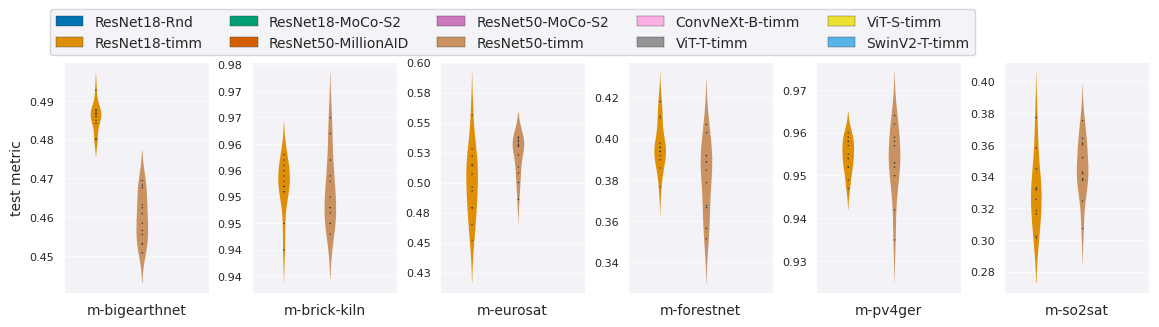

In [5]:
# df['train_ratio'] = [get_train_ratio(part_name) for part_name in df['partition_name']]
df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

df = df[~df.model.isin(("conv4",))]

print(df.model.unique())

model_order = "ResNet18-Rnd,ResNet18-timm,ResNet18-MoCo-S2,ResNet50-MillionAID,ResNet50-MoCo-S2,ResNet50-timm,ConvNeXt-B-timm,ViT-T-timm,ViT-S-timm,SwinV2-T-timm".split(",")
model_colors = dict( zip(model_order, sns.color_palette("colorblind")[:len(model_order)]))

df_1x = df[(df["partition name"] == "0.01x train") | (df["partition name"] == "default")].copy()
# df_1x = df[(df["partition name"] == "0.05x train")].copy()

benchmark_name = "classification_v0.8.5"
if rewrite_normalizer:
    normalizer = parse_results.make_normalizer(df_1x)
    normalizer.save(benchmark_name)
else:
    normalizer = parse_results.load_normalizer(benchmark_name)

normalizer.normalize_data_frame(df_1x, ["test metric", "val metric"])

parse_results.plot_per_dataset_3(df_1x, model_order, model_colors=model_colors, metric="test metric", sharey=False, inner="points", fig_size=(14,3), n_legend_rows=2)
plt.savefig(Path.home() / "figures" / "classification test metric.pdf", bbox_inches="tight", dpi=300)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/home/figures/classification normalized test metric.pdf'

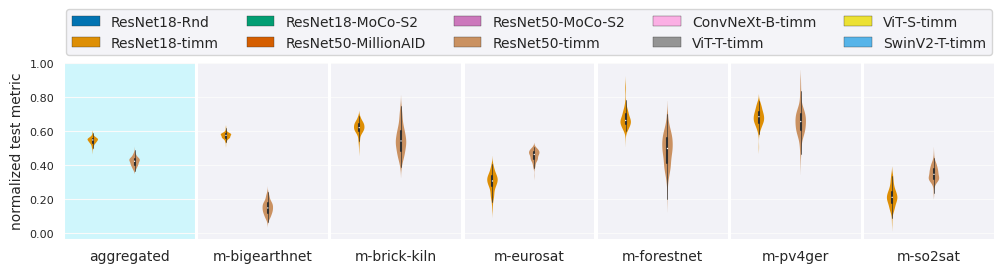

In [4]:
parse_results.plot_bootstrap_aggregate(df_1x, metric="normalized test metric", model_order=model_order, model_colors=model_colors, fig_size=(12,2.3))
# parse_results.plot_bootstrap_aggregate(df_1x, metric="normalized val_metric", model_order=model_order)
plt.savefig(Path.home() / "figures" / "classification normalized test metric.pdf", bbox_inches="tight", dpi=300)

## Growing Train Size


In [ ]:
classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'
df = retrieve_runs(classification_dir, use_cached_csv=True, is_sweep=False)

df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)
# df = df[~df.model.isin(("conv4",))]


df_1x = df[(df["partition name"] == "1.00x train") | (df["partition name"] == "default")].copy()
# df_1x = df[(df["partition name"] == "0.05x train")].copy()

normalizer = parse_results.make_normalizer(df_1x)
normalizer.normalize_data_frame(df, ["test metric", "val metric"])

model_order = "ResNet18-Rnd,ResNet50-timm,ConvNeXt-B-timm,ViT-T-timm,ViT-S-timm,SwinV2-T-timm".split(",")

parse_results.plot_bootstrap_aggregate_growing(df, metric="normalized test metric", model_order=model_order, model_colors=model_colors,  fig_size=(12,2))
plt.savefig(Path.home() / "figures" / "classification growing test metric.pdf", bbox_inches="tight", dpi=300)

## Train Size Analysis

In [ ]:
# classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'
classification_dir = '/mnt/data/experiments/nils/last_classification_sweeps'

df = retrieve_runs(classification_dir, use_cached_csv=True, is_sweep=True)
df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

df = df[~df.model.isin(("conv4","MoCo ResNet50"))]


plt.figure(figsize=(6,4), dpi=100)
parse_results.plot_normalized_time(df, average_seeds=True, reference_ratio=0.1)
plt.savefig(Path.home() / "figures" / "training time.pdf", bbox_inches="tight")


In [ ]:
classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'

df = retrieve_runs(classification_dir, use_cached_csv=True, is_sweep=True)
df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

df_filtered = df[~df.model.isin(("conv4",))]

parse_results.plot_discriminative_metric(df_filtered, metric="val metric", n_largest=100, fig_size=(8,5))
plt.savefig(Path.home() / "figures" / "discriminativity.pdf", bbox_inches="tight")


In [ ]:
count = parse_results.count_exp(df)

count.style.applymap(lambda x: "background-color: red" if x<10 else "background-color: white")
count


# Segmentation
## Main Results

In [ ]:
segmentation_dir = '/mnt/data/experiments/nils/final_segmentation_seeded_runs'

df = retrieve_runs(segmentation_dir, use_cached_csv=True, is_sweep=False)

print(df.model.unique())

df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)
print(df.model.unique())

model_order = 'ResNet18-U-Net-timm,ResNet50-U-Net-timm,ResNet101-U-Net-timm,ResNet18 DeepLabV3-timm,ResNet50 DeepLabV3-timm,ResNet101 DeepLabV3-timm'.split(',')
colors = sns.color_palette("colorblind")
colors = [colors[i] for i in [0,1,2,4,8,9]]
model_colors = dict( zip(model_order, colors))

df_1x = df[(df["partition name"] == "1.00x train") | (df["partition name"] == "default")].copy()
# df_1x = df[(df["partition name"] == "0.05x train")].copy()

normalizer = parse_results.make_normalizer(df_1x)
normalizer.normalize_data_frame(df_1x, ["test metric", "val metric"])

parse_results.plot_per_dataset_3(df_1x, model_order, model_colors=model_colors, metric="test metric", sharey=False, inner="points", fig_size=(14,3), n_legend_rows=2)
plt.savefig(Path.home() / "figures" / "segmentation test metric.pdf", bbox_inches="tight", dpi=300)



In [ ]:
parse_results.plot_bootstrap_aggregate(df_1x, metric="normalized test metric", model_order=model_order, model_colors=model_colors, fig_size=(12,2.3))
# parse_results.plot_bootstrap_aggregate(df_1x, metric="normalized val_metric", model_order=model_order)
plt.savefig(Path.home() / "figures" / "segmentation normalized test metric.pdf", bbox_inches="tight", dpi=300)

## Growing train size

In [ ]:
segmentation_dir = '/mnt/data/experiments/nils/final_segmentation_seeded_runs'
df = retrieve_runs(segmentation_dir, use_cached_csv=True, is_sweep=False)

df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

df_1x = df[(df["partition name"] == "1.00x train") | (df["partition name"] == "default")].copy()
# df_1x = df[(df["partition name"] == "0.05x train")].copy()

normalizer = parse_results.make_normalizer(df_1x)
normalizer.normalize_data_frame(df, ["test metric", "val metric"])

# model_order = 'resnet18 Unet,resnet50 Unet,resnet101 Unet,resnet18 DeepLabV3,resnet50 DeepLabV3,resnet101 DeepLabV3'.split(',')

parse_results.plot_bootstrap_aggregate_growing(df, metric="normalized test metric", model_order=model_order, model_colors=model_colors, fig_size=(12,2))
plt.savefig(Path.home() / "figures" / "segmentation growing test metric.pdf", bbox_inches="tight", dpi=300)

In [ ]:
parse_results.count_exp(df)

# Beyond RGB

## load data

In [ ]:
# directory where all the sweeps experiments are logged
# beyond_classification_dir =  '/mnt/data/experiments/nils/beyond_rgb_classification_sweeps'
beyond_classification_dir = '/mnt/data/experiments/nils/final_classification_beyond_rgb_seeded_runs'


# brgb_df =  pd.read_csv(Path(beyond_classification_dir)/ "recent_result.csv" )
brgb_df = retrieve_runs(beyond_classification_dir, use_cached_csv=True, is_sweep=False)

def remap_models(val):
    map = {
        "resnet50": "ResNet50-timm+R-Multi",
        "moco_resnet50": "moco_resnet50-multi",
        "dino_resnet50": "dino_resnet50-multi",
        "vit_small_patch16_224": "ViT-S-timm+R-Multi",
        "moco_vit_small_patch16_224": "moco_vit_small_patch16_224-multi",
        "dino_vit_small_patch16_224": "dino_vit_small_patch16_224-multi",
    }
    try:
        return map.get(val, val)
    except:
        return val

print(brgb_df.model.unique())

brgb_df = brgb_df.applymap(remap_models)

classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'
df_cls = retrieve_runs(classification_dir, use_cached_csv=True, is_sweep=False)
datasets = brgb_df.dataset.unique()
rgb_models_df = df_cls[df_cls.partition_name.isin(("1.00x_train","default")) & df_cls.model.isin(("resnet50", "vit_small_patch16_224")) & df_cls.dataset.isin(datasets)].copy()

brgb_df = pd.concat((brgb_df, rgb_models_df), axis=0)

brgb_df = brgb_df.applymap(parse_results.clean_names)
brgb_df = brgb_df.rename(columns=parse_results.clean_names)
print(','.join(brgb_df.model.unique()))

model_order1 = "ResNet50-timm,ResNet50-timm+R-Multi,ResNet50-MoCo-S2-multi,ResNet50-DINO-S2-multi".split(",")
model_colors1 = dict( zip(model_order1, sns.color_palette("colorblind", len(model_order1))))

model_order2 = "ViT-S-timm,ViT-S-timm+R-Multi,ViT-S-MoCo-S2-multi,ViT-S-DINO-S2-multi".split(",")
model_colors2 = dict( zip(model_order2, sns.color_palette("colorblind")[len(model_order1):]))

parse_results.count_exp(brgb_df)


# normalizer = parse_results.make_normalizer(df_1x)
# normalizer.normalize_data_frame(df_1x, ["test metric", "val metric"])

# parse_results.plot_per_dataset_3(df_1x, model_order, model_colors=model_colors, metric="test metric", sharey=False, inner="points", fig_size=(14,3), n_legend_rows=2)
# plt.savefig(Path.home() / "figures" / "classification test metric.pdf", bbox_inches="tight", dpi=300)

## Beyond RGB ablation

In [ ]:
parse_results.plot_per_dataset_3(brgb_df, model_order1, model_colors=model_colors1, metric="test metric", sharey=False, inner="points", fig_size=(7,3), n_legend_rows=2)
parse_results.plot_per_dataset_3(brgb_df, model_order2, model_colors=model_colors2, metric="test metric", sharey=False, inner="points", fig_size=(7,3), n_legend_rows=2)
plt.savefig(Path.home() / "figures" / "brgb classification resnet.pdf", bbox_inches="tight", dpi=300)
plt.savefig(Path.home() / "figures" / "brgb classification vit.pdf", bbox_inches="tight", dpi=300)


In [ ]:
# df_cls = df_cls.applymap(parse_results.clean_names)
# df_cls = df_cls.rename(columns=parse_results.clean_names)
# normalizer = parse_results.make_normalizer(df_cls)

normalizer.normalize_data_frame(brgb_df, ["test metric", "val metric"])

parse_results.plot_bootstrap_aggregate(brgb_df, metric="normalized test metric", model_order=model_order1, model_colors=model_colors1, fig_size=(6,2.3))
plt.savefig(Path.home() / "figures" / "brgb normalized resnet.pdf", bbox_inches="tight", dpi=300)

parse_results.plot_bootstrap_aggregate(brgb_df, metric="normalized test metric", model_order=model_order2, model_colors=model_colors2, fig_size=(6,2.3))
plt.savefig(Path.home() / "figures" / "brgb normalized vit.pdf", bbox_inches="tight", dpi=300)

# Speed and Mem 


In [ ]:

pkl_file = "/mnt/data/experiments/nils/speed_and_mem/speed_and_mem_table.pkl"

classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'
classification_dir = '/mnt/data/experiments/nils/last_classification_sweeps'

df = retrieve_runs(classification_dir, use_cached_csv=True, is_sweep=True)
df = df[df.partition_name.isin(("1.00x_train","default"))]
df = df[~df.model.isin(("conv4",))]

df = df.applymap(parse_results.clean_names)
df = df.rename(columns=parse_results.clean_names)

model_order = "resnet18,scratch_resnet18,moco_resnet18,resnet50,millionaid_resnet50,moco_resnet50,vit_tiny_patch16_224,vit_small_patch16_224,swinv2_tiny_window16_256,convnext_base".split(",")

parse_results.plot_speed_results(pkl_file, df, model_order)
plt.savefig(Path.home() / "figures" / "resources.pdf", bbox_inches="tight", dpi=300)
